In [25]:
import pymongo 
import pandas as pd
import numpy as np
import config

In [26]:
# Connect with the portnumber and host  
client = pymongo.MongoClient(config.mongo_conn)  
    
# Access database  
cl_db = client['craigslist_db']  
    
# Access collection of the database  
cl_collection = cl_db['listings']  

In [27]:
# cusor with listing_date
# #cursor = cl_collection.find({},{ 'data_id': 1, 'listing_price': 1, 'listing_addrlocality': 1,'listing_addrzip': 1,'listing_bedbath': 1,'listing_type': 1, 'listing_datetime': 1,'listing_sqft': 1, '_id': 0 })   

cursor = cl_collection.find({},{ 'data_id': 1, 'listing_price': 1, 'listing_addrlocality': 1,'listing_addrzip': 1,'listing_bedbath': 1,'listing_type': 1,'listing_sqft': 1, '_id': 0 })   

list_cur = list(cursor)
df = pd.DataFrame(list_cur)
df["listing_price"] = df["listing_price"].str.replace("$","")
df["listing_price"] = df["listing_price"].str.replace(",","")
df["listing_sqft"] = df["listing_sqft"].str.replace("ft2","")
df.head()

,data_id,listing_price,listing_addrlocality,listing_addrzip,listing_bedbath,listing_type,listing_sqft
0,7278244211,2095,Carlsbad,92009,1BR / 1Ba,Apartment,679
1,7280806990,2920,San Diego,92121,2BR / 2Ba,Apartment,1098
2,7278515816,1575,Escondido,92033,2BR / 2Ba,Apartment,948
3,7277910674,2030,San Marcos,92079,1BR / 1Ba,Apartment,829
4,7279719841,1437,Escondido,92033,1BR / 1Ba,Apartment,668


In [5]:
df.count()

data_id                 9069
listing_price           9069
listing_addrlocality    8989
listing_addrzip         8989
listing_bedbath         8989
listing_type            8989
listing_sqft            8989
dtype: int64

In [28]:
df.dropna()

,data_id,listing_price,listing_addrlocality,listing_addrzip,listing_bedbath,listing_type,listing_sqft
0,7278244211,2095,Carlsbad,92009,1BR / 1Ba,Apartment,679
1,7280806990,2920,San Diego,92121,2BR / 2Ba,Apartment,1098
2,7278515816,1575,Escondido,92033,2BR / 2Ba,Apartment,948
3,7277910674,2030,San Marcos,92079,1BR / 1Ba,Apartment,829
4,7279719841,1437,Escondido,92033,1BR / 1Ba,Apartment,668
...,...,...,...,...,...,...,...
9064,7281497359,700,San Ysidro,92173,3BR / 2Ba,House,
9065,7281495651,15000,Imperial Beach,91932,2BR / 1Ba,Apartment,
9066,7281496781,1500,Imperial Beach,91932,4BR / 3Ba,House,
9067,7281495157,850,San Diego,92154,2BR / 1.5Ba,House,


In [30]:

blank_listing_sqft_df = df.loc[df['listing_sqft'] == '']
data_ids_blank_sqft = blank_listing_sqft_df['data_id']

# loop through blank sqft ids (drop blank sqft ids)
for data_id in data_ids_blank_sqft:
    df.drop(df.index[df['data_id'] == data_id], inplace = True)

blank_zip_sqft_df = df.loc[df['listing_addrzip'] == '']
data_ids_blank_zip = blank_zip_sqft_df['data_id']

# loop through blank zip (drop blank zip ids)
for data_id in data_ids_blank_zip:
    df.drop(df.index[df['data_id'] == data_id], inplace = True)

df.dropna()

,data_id,listing_price,listing_addrlocality,listing_addrzip,listing_bedbath,listing_type,listing_sqft
0,7278244211,2095,Carlsbad,92009,1BR / 1Ba,Apartment,679
1,7280806990,2920,San Diego,92121,2BR / 2Ba,Apartment,1098
2,7278515816,1575,Escondido,92033,2BR / 2Ba,Apartment,948
3,7277910674,2030,San Marcos,92079,1BR / 1Ba,Apartment,829
4,7279719841,1437,Escondido,92033,1BR / 1Ba,Apartment,668
...,...,...,...,...,...,...,...
9049,7281626371,2100,San Diego,92115,2BR / 2Ba,Apartment,954
9052,7281620514,1545,Chula Vista,91909,1BR / 1Ba,Apartment,700
9053,7281619617,1825,Chula Vista,91909,2BR / 2Ba,Apartment,1000
9054,7281618679,1795,Chula Vista,91909,2BR / 2Ba,Apartment,900


In [31]:
zero_price_df = df.loc[df['listing_price'] == 0]
zero_price_df

zero_price_ids = blank_zip_sqft_df['data_id']

# loop through zero price ids (drop zero price ids)
for data_id in zero_price_ids:
    df.drop(df.index[df['data_id'] == data_id], inplace = True)

zero_price_ids

Series([], Name: data_id, dtype: object)

In [32]:
clean_df = df.dropna()

In [34]:
clean_df["listing_price"] = clean_df["listing_price"].astype(int)
clean_df["listing_addrzip"] = clean_df["listing_addrzip"].astype(int)
clean_df["listing_sqft"] = pd.to_numeric(clean_df['listing_sqft'] , downcast = "float" )


In [35]:
clean_df.sort_values(by=['listing_price'], ascending=True).head(10)

,data_id,listing_price,listing_addrlocality,listing_addrzip,listing_bedbath,listing_type,listing_sqft
7699,7278379486,0,San Diego,92153,2BR / 1Ba,Apartment,905.0
8430,7281380935,0,San Diego,92153,2BR / 1Ba,Apartment,905.0
7147,7279847309,0,San Diego,92153,2BR / 1Ba,Apartment,905.0
7364,7279302092,0,San Diego,92153,2BR / 1Ba,Apartment,905.0
7636,7278501857,0,San Diego,92153,2BR / 1Ba,Apartment,905.0
7510,7278878320,0,San Diego,92153,2BR / 1Ba,Apartment,905.0
7171,7279812685,0,San Diego,92153,2BR / 1Ba,Apartment,905.0
7695,7278391203,0,San Diego,92153,2BR / 1Ba,Apartment,805.0
7550,7278807817,0,San Diego,92153,2BR / 1Ba,Apartment,905.0
7174,7279812490,0,San Diego,92153,2BR / 1Ba,Apartment,905.0


In [36]:
clean_df.dtypes 

data_id                  object
listing_price             int32
listing_addrlocality     object
listing_addrzip           int32
listing_bedbath          object
listing_type             object
listing_sqft            float32
dtype: object

In [37]:
grouped_zip_df = clean_df.groupby(["listing_addrzip"])
grouped_zip_df.head()

,data_id,listing_price,listing_addrlocality,listing_addrzip,listing_bedbath,listing_type,listing_sqft
0,7278244211,2095,Carlsbad,92009,1BR / 1Ba,Apartment,679.0
1,7280806990,2920,San Diego,92121,2BR / 2Ba,Apartment,1098.0
2,7278515816,1575,Escondido,92033,2BR / 2Ba,Apartment,948.0
3,7277910674,2030,San Marcos,92079,1BR / 1Ba,Apartment,829.0
4,7279719841,1437,Escondido,92033,1BR / 1Ba,Apartment,668.0
...,...,...,...,...,...,...,...
8208,7281139791,1,Borrego Springs,92004,6BR / 4Ba,House,4000.0
8228,7281098400,2850,El Cajon,92019,3BR / 3Ba,House,1600.0
8238,7276478747,2895,San Diego,92114,3BR / 2.5Ba,House,1800.0
8268,7281431428,2700,La Jolla,92092,1BR / 1Ba,Apartment,550.0


In [39]:
# mean, median, variance, standard deviation, and SEM of the listing_price 
mean_listing_price = grouped_zip_df["listing_price"].mean()

# Assemble the resulting series into a single summary dataframe.

summary_stats_df = pd.DataFrame(
    {"Mean": mean_listing_price,
    "Location": grouped_zip_df["listing_addrlocality"].unique(),
    })
summary_stats_df

,Mean,Location
listing_addrzip,,
20011,1835.000000,[Washington]
67340,4150.000000,[Dearing]
89173,1126.500000,[Las Vegas]
91901,1450.000000,[Alpine]
91902,2061.807692,[Bonita]
...,...,...
92198,2392.312500,[San Diego]
92199,2303.280000,[San Diego]
92531,2400.000000,[Lake Elsinore]


In [40]:
summary_stats_highpricezips_df = summary_stats_df.sort_values(by=['Mean'], ascending=False).head(10)
summary_stats_lowpricezips_df = summary_stats_df.sort_values(by=['Mean'], ascending=True).head(10)

In [41]:
summary_stats_highpricezips_df

,Mean,Location
listing_addrzip,,
92091,21200.000000,[Rancho Santa Fe]
92155,6000.000000,[San Diego]
67340,4150.000000,[Dearing]
92075,3749.285714,[Solana Beach]
92093,3641.642857,[La Jolla]
92029,3500.833333,[Escondido]
92130,3040.115385,[San Diego]
92014,2970.391892,[Del Mar]
92147,2943.984615,[San Diego]


In [42]:
summary_stats_lowpricezips_df

,Mean,Location
listing_addrzip,,
92040,0.000000,[Lakeside]
92004,1.000000,[Borrego Springs]
91987,500.000000,[Tecate]
91905,557.000000,[Boulevard]
92003,604.076923,[Bonsall]
89173,1126.500000,[Las Vegas]
92036,1156.250000,[Julian]
92153,1226.937500,[San Diego]
91935,1375.000000,[Jamul]


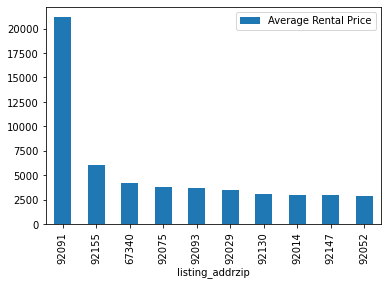

In [43]:
average_highprices = summary_stats_highpricezips_df['Mean']
locations_high = summary_stats_highpricezips_df['Location']
df_avghigh = pd.DataFrame({'Average Rental Price': average_highprices, 'Location': locations_high})
ax = df_avghigh.plot.bar(rot=90)





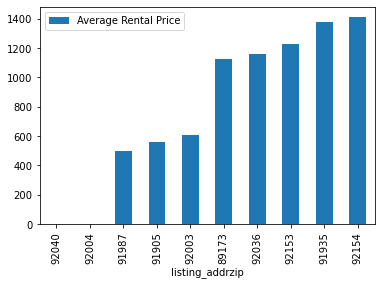

In [44]:
average_lowprices = summary_stats_lowpricezips_df['Mean']
locations_low = summary_stats_lowpricezips_df['Location']
df_avglow = pd.DataFrame({'Average Rental Price': average_lowprices, 'Location': locations_low})
ax = df_avglow.plot.bar(rot=90)

